In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd

from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, VPacker

plt.rcParams.update({'font.size': 18})
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
# Time
base = np.array([1.000, 1.000])
sft_25 = (np.array([1.016, 1.000]) - base) * 100
sft_100 = (np.array([1.163, 0.981]) - base) * 100
dpo_qvs = (np.array([0.977, 0.976]) - base) * 100
dpo_pvf = (np.array([1.009, 1.025]) - base) * 100
dpo_all = (np.array([0.947, 1.154]) - base) * 100

time = pd.DataFrame({
    '$\mathcal{SFT}_{25}$': sft_25,
    '$\mathcal{SFT}_{100}$': sft_100,
    '$\mathcal{DPO}_{QvS}$': dpo_qvs,
    '$\mathcal{DPO}_{PvF}$': dpo_pvf,
    '$\mathcal{DPO}_{All}$': dpo_all,
})

time.index = ['MBPP', 'HumanEval']

In [3]:
# Length
base = np.array([1.000, 1.000])
sft_25 = (np.array([1.520, 1.285]) - base) * 100
sft_100 = (np.array([1.863, 1.551]) - base) * 100
dpo_qvs = (np.array([0.798, 0.918]) - base) * 100
dpo_pvf = (np.array([0.891, 1.003]) - base) * 100
dpo_all = (np.array([0.785, 0.916]) - base) * 100

length = pd.DataFrame({
    '$\mathcal{SFT}_{25}$': sft_25,
    '$\mathcal{SFT}_{100}$': sft_100,
    '$\mathcal{DPO}_{QvS}$': dpo_qvs,
    '$\mathcal{DPO}_{PvF}$': dpo_pvf,
    '$\mathcal{DPO}_{All}$': dpo_all,
})

length.index = ['MBPP', 'HumanEval']

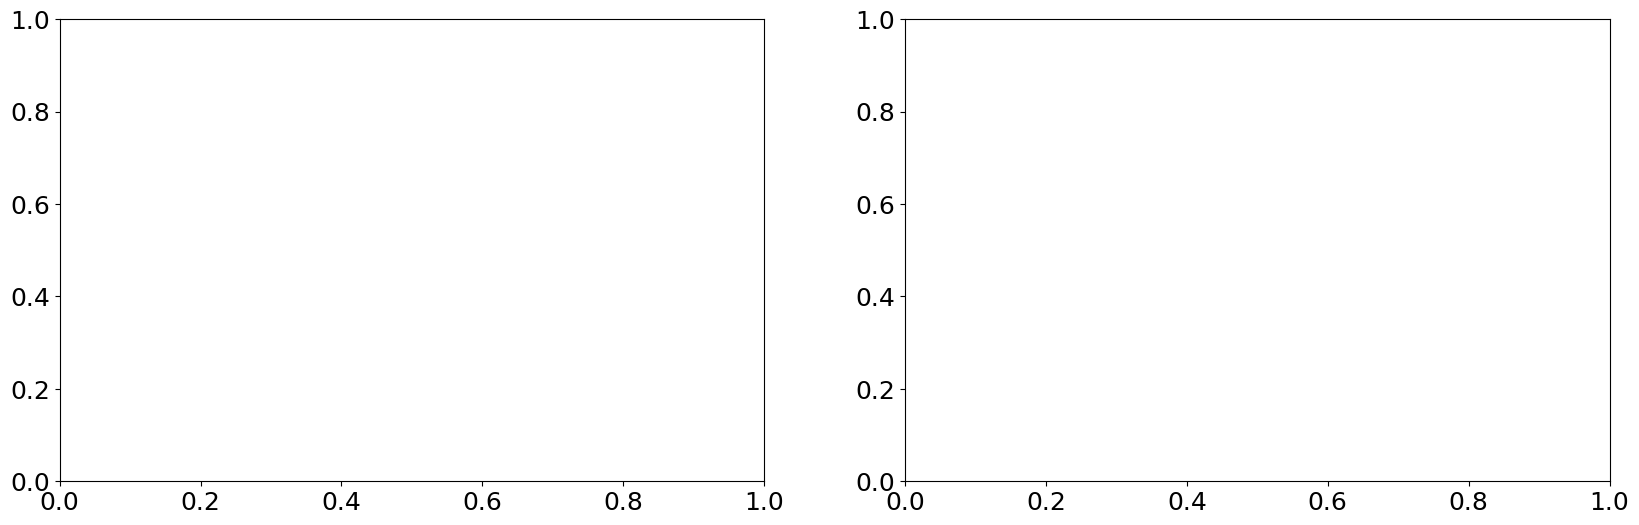

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

In [5]:
axes[0].set_axisbelow(True)
axes[1].set_axisbelow(True)

In [6]:
time.plot.bar(ax=axes[0], legend=False, rot=0, width=0.7, alpha=0.99, color=colors[1:]).grid(axis='y', linestyle='--')
length.plot.bar(ax=axes[1], legend=False, rot=0, width=0.7, alpha=0.99, color=colors[1:]).grid(axis='y', linestyle='--')

In [7]:
patterns = ['/', '\\', '-', 'o', '.', '*'][1:]

bars = axes[0].patches
hatches = ''.join(h * len(time) for h in patterns)

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
    
bars = axes[1].patches
hatches = ''.join(h * len(length) for h in patterns)

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

In [8]:
axes[0].set_title('Time')
axes[1].set_title('Length')

Text(0.5, 1.0, 'Length')

In [9]:
ybox1 = TextArea('Slower →', textprops=dict(color='r', size=14, rotation=90, ha='left'))
ybox2 = TextArea(' | ',     textprops=dict(color='k', size=14, rotation=90, ha='left'))
ybox3 = TextArea('← Faster', textprops=dict(color='g', size=14, rotation=90, ha='left'))

ybox = VPacker(children=[ybox1, ybox2, ybox3])

anchored_ybox = AnchoredOffsetbox(
    loc='center', child=ybox, frameon=False, bbox_to_anchor=(-0.15, 0.27), bbox_transform=axes[0].transAxes
)
axes[0].add_artist(anchored_ybox)

In [10]:
ybox1 = TextArea('Longer →', textprops=dict(color='r', size=14, rotation=90, ha='left'))
ybox2 = TextArea(' | ',     textprops=dict(color='k', size=14, rotation=90, ha='left'))
ybox3 = TextArea('← Shorter', textprops=dict(color='g', size=14, rotation=90, ha='left'))

ybox = VPacker(children=[ybox1, ybox2, ybox3])

anchored_ybox = AnchoredOffsetbox(
    loc='center', child=ybox, frameon=False, bbox_to_anchor=(-0.15, 0.22), bbox_transform=axes[1].transAxes
)
axes[1].add_artist(anchored_ybox)

In [11]:
axes[0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

In [12]:
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0), ncol=len(labels))

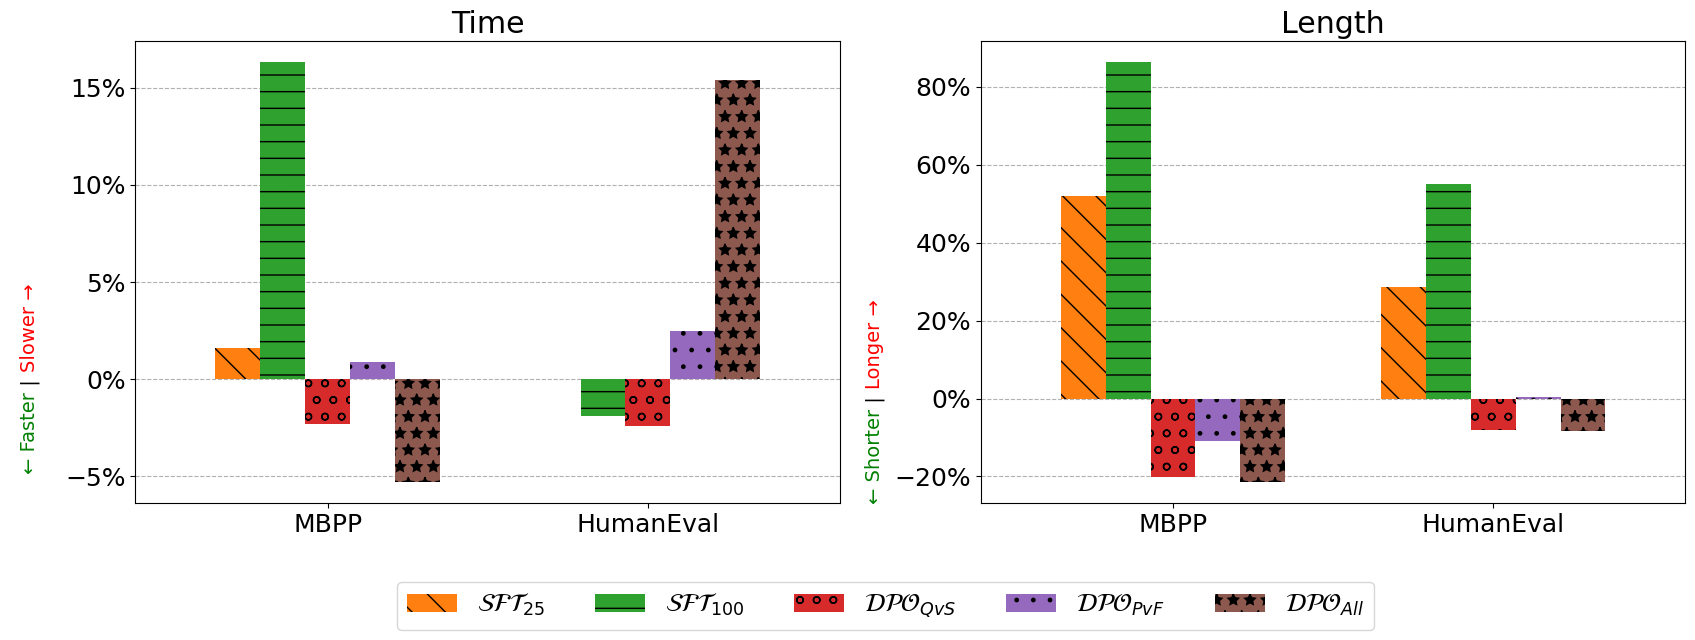

In [13]:
fig

In [14]:
fig.savefig('time_length.pdf', bbox_inches='tight')